In [ ]:
#–†–∞–∑–≤–∏—Ç–∏–µ —Ö–∏–ø-—Ö–æ–ø –∏–Ω–¥—É—Å—Ç—Ä–∏–∏ –≤ –†–µ—Å–ø—É–±–ª–∏–∫–µ –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω –∏ –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–±–ª–∞—Å—Ç–∏ 

In [1]:
import vk 

In [2]:
import re

In [3]:
token = ""  
session = vk.Session(access_token=token)  
vk_api = vk.API(session)  

In [4]:
personal_token = ""   
session = vk.Session(access_token=personal_token)  
vk_personal_api = vk.API(session)  

In [5]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  
    data = first["items"]  
    count = first["count"] // 1000  
    
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [6]:
members = get_members ('zatmenie_official')

In [7]:
zatmenie_official_members = get_members('zatmenie_official')
len(zatmenie_official_members)


1797

In [8]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] 
            first_name = member["first_name"] 
            last_name = member["last_name"] 
            
            sex = member["sex"] 
            if int(sex) == 1:   
                sex = "F"  
            elif int(sex) == 2:   
                sex = "M" 
            else:  
                sex = "-"  
                
            bdate = member.get('bdate', "-")   
            if len(bdate.split(".")) == 3:  
                bdate = bdate.split(".")[-1]  
            else:  
                bdate = "-"  
                
            city = member.get('city', {}).get("title", "-")  
            country = member.get('country', {}).get("title", "-")  
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  

In [9]:
save_members_to_file ('zatmenie_official_members.tsv', members)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import pandas as pd

df = pd.read_csv('zatmenie_official.tsv', sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [12]:
df.head(10)

id        name     surname sex birth       city country
0    32369,   Vladislav     Denchik   M  1990          -       -
1   921196,  Kurilschik  Olimpiysky   M     -      Kazan  Russia
2  1018157,         Gio     Dzhioev   M     -  Syktyvkar  Russia
3  1307644,     Nikolay      Osipov   M     -      Kazan  Russia
4  1603716,       Artem     Artemov   M     -      Kazan  Russia
5  1698775,     DELETED         NaN   M     -          -       -
6  1765475,      Eduard    Sirazeev   M     -      Kazan  Russia
7  2076618,        Adel     Enikeev   M     -      Kazan  Russia
8  2184371,   Anzhelika    Kalinina   F     -      Kazan  Russia
9  2295372,     DELETED         NaN   F     -          -       -

In [13]:
city_count  = df['city'].value_counts().drop('-') # —Å—á–∏—Ç–∞–µ–º –≥–æ—Ä–æ–¥–∞ –∏ —É–¥–∞–ª—è–µ–º –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –≥–æ—Ä–æ–¥–∞ –≤ —Ç–∞–±–ª–∏—á–∫–µ: "-"
city_count = city_count[:20] # –ø–µ—Ä–≤—ã–µ 20 –≥–æ—Ä–æ–¥–æ–≤
print(city_count)

Kazan                      757
Moscow                      59
Saint Petersburg            13
Kyiv                         9
Naberezhnye Chelny           7
Samara                       6
Yekaterinburg                4
Zelenodolsk                  4
Perm                         4
Los Angeles                  4
Ulyanovsk                    4
Rostov-on-Don                4
Mykolaiv                     4
Almetyevsk                   3
Ufa                          3
Odessa                       3
Krasnodar                    3
Nizhnekamsk                  3
Dnipropetrovsk (Dnipro)      3
Amsterdam                    2
Name: city, dtype: int64


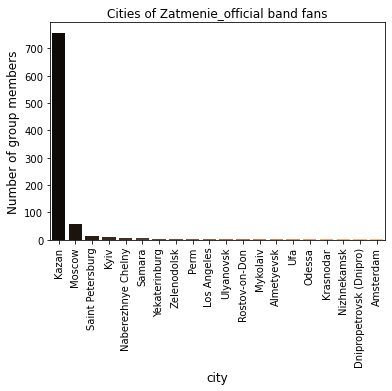

In [16]:
sns.barplot(city_count.index, city_count.values, palette='copper') 
plt.title('Cities of Zatmenie_official band fans')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.xticks(rotation=90) 
plt.show()

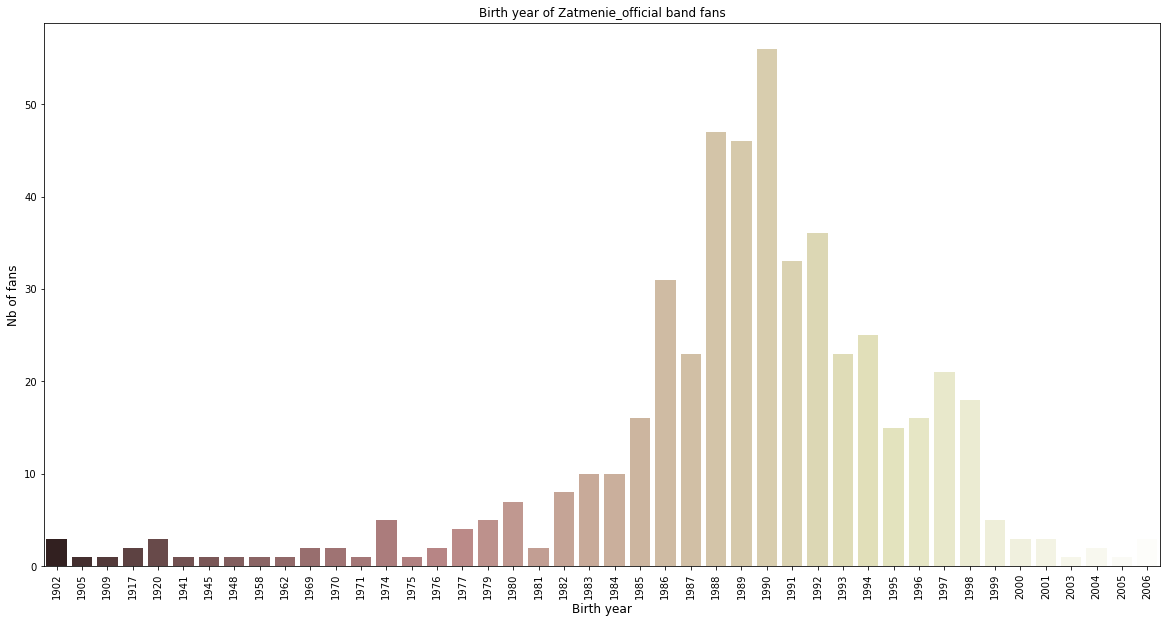

In [61]:
birth_count  = df['birth'].value_counts().drop('-')
plt.figure(figsize=(20,10))
ax = sns.barplot(birth_count.index, birth_count.values, palette='pink') 
plt.title('Birth year of Zatmenie_official band fans')
plt.ylabel('Nb of fans', fontsize=12)
plt.xlabel('Birth year', fontsize=12)
plt.xticks(rotation=90) 
plt.show() 

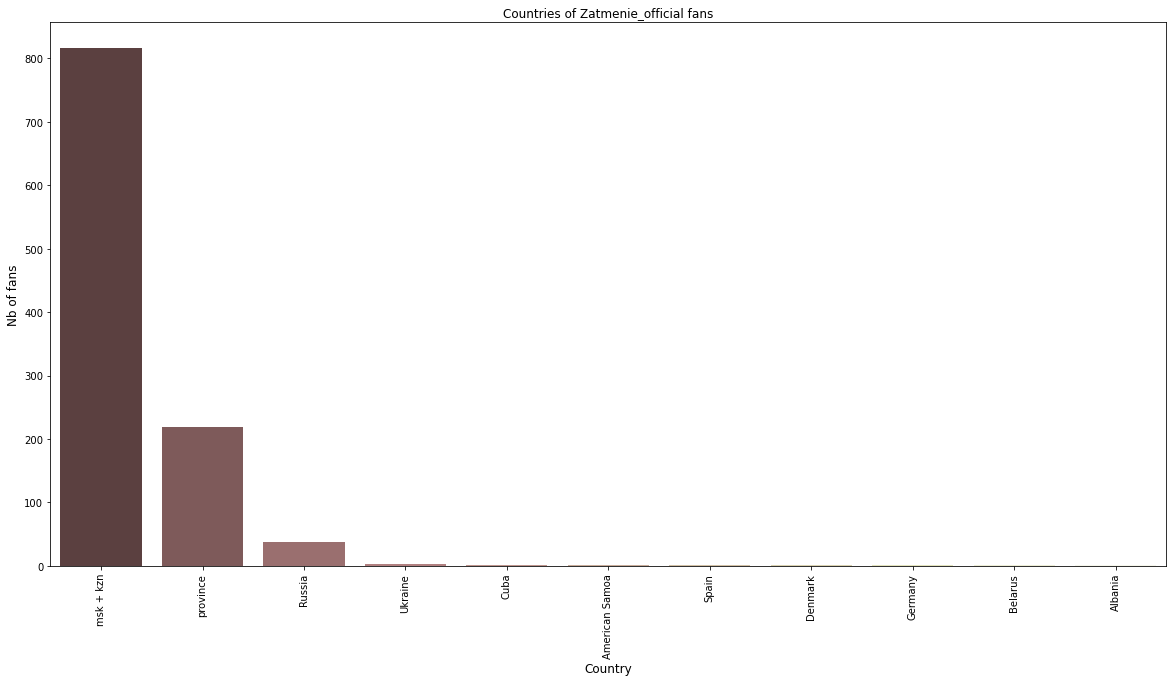

In [29]:
country_count = df["country"].value_counts().drop("-")
country_count = country_count [0:20]
plt.figure(figsize=(20,10))
ax = sns.barplot(country_count.index,country_count.values, palette="pink")
plt.title("Countries of Zatmenie_official fans")
plt.ylabel("Nb of fans", fontsize=12)
plt.xlabel("Country", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [18]:
df.loc[(df['city'] == 'Moscow')] = "msk + kzn"
df.loc[(df['city'] == 'Kazan')] = "msk + kzn"
df.loc[(df['city'] != "msk + kzn") & (df['city'] != "-")] = "province"


city_count  = df['city'].value_counts().drop('-') 
city_count = city_count[:20] 

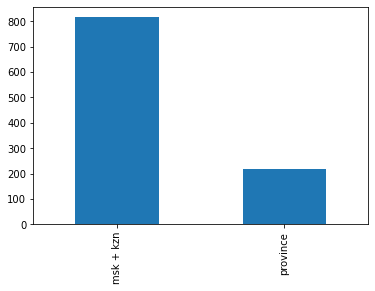

In [19]:
axes = city_count.plot.bar() 

In [20]:
new_df = df[df['sex'].ne('-')] 
new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') 

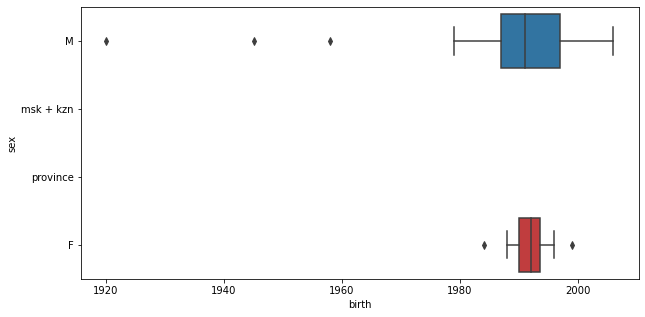

In [21]:
plt.figure(figsize=(10,5)) 
sns.boxplot(x="birth", y="sex", data=new_df) 
plt.show()

In [22]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  
    count = first["count"] // 100  
    
    
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return [i['text'] for i in data]

In [23]:
zatmenie_official_posts = get_posts("zatmenie_official")

In [24]:
for post in zatmenie_official_posts[:10]:
    print(post)

–ü—Ä–µ–¥–ª–∞–≥–∞—é –≤–∞—à–µ–º—É –≤–Ω–∏–º–∞–Ω–∏—é –º–æ–π —Å–æ–ª—å–Ω—ã–π –ª–∏—Ä–∏—á–µ—Å–∫–∏–π —Ç—Ä–µ–∫, —Å–æ–±—Ä–∞–Ω–Ω—ã–π –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ 3-—Ö –ª–µ—Ç, –≤ –∫–æ—Ç–æ—Ä—ã–π –≤–ª–æ–∂–µ–Ω–∞ —á–∞—Å—Ç–∏—á–∫–∞ –¥—É—à–∏ –∏ –≥–æ–¥—ã –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è. –ü–æ—Å–≤—è—â–∞–µ—Ç—Å—è –≤—Å–µ–º –Ω–∞—à–µ–Ω—Å–∫–∏–º, –≤—Å–µ–º –±–ª–∏–∑–∫–∏–º –∏ —Ä–æ–¥–Ω—ã–º –º–Ω–µ –ª—é–¥—è–º. "–≠—Ç–æ –¥—É—à–µ–≤–Ω–∞—è —Å–∞–≥–∞, —Ç–∞–∫–∏–º –∂–µ –≤–æ –±–ª–∞–≥–æ..." 
–°–∞–ª–∞–º –í—Å–µ–º –î–æ—Å—Ç–æ–π–Ω—ã–º
–°—Ç–∏—Ö–æ—Ç–≤–æ—Ä–µ–Ω–∏–µ. 2020–≥. –ê–≤—Ç–æ—Ä: –§–µ–Ω–∏–∫—Å
–ü–æ–∫–∞ –≤ —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–µ –Ω–æ–≤—ã–µ —Ç—Ä–µ–∫–∏, –ø–æ–Ω–∞—Å—Ç–∞–ª—å–≥–∏—Ä—É–µ–º —Å—Ç–∞—Ä–µ–Ω—å–∫–∏–º –∞–Ω–¥–µ—Ä–æ–º –±—ã–ª–æ–π —é–Ω–æ—Å—Ç–∏. –î–æ–±—Ä–æ–≥–æüëê

(2015 –≥–æ–¥, –∞–ª—å–±–æ–º "–î–µ—Ä–∂–∏ –º–∞—Ä–∫—É")
–ó–∏–º–Ω—è—è —Å–æ–≤–º–µ—Å—Ç–∫–∞ —Å –ë—É–ª–∞—Ç–æ–º –∏–∑ –¢–ê–°–ú–ê 87. –ü—Ä–∏–Ω—è—Ç—å —É—á–∞—Å—Ç–∏—è –≤ —Å–≤–µ–¥–µ–Ω–∏–∏ –Ω–µ —É–¥–∞–ª–æ—Å—å –≤ —Å–∏–ª—É –º–æ–µ–≥–æ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è, –Ω–æ –≤—Ä–æ–¥–µ –Ω–µ –ø–ª–æ—Ö–æ üòâ
üòä
–ü–æ –ø—Ä–æ—Å—å–±

In [21]:
print (zatmenie_official_posts)

['–ü—Ä–µ–¥–ª–∞–≥–∞—é –≤–∞—à–µ–º—É –≤–Ω–∏–º–∞–Ω–∏—é –º–æ–π —Å–æ–ª—å–Ω—ã–π –ª–∏—Ä–∏—á–µ—Å–∫–∏–π —Ç—Ä–µ–∫, —Å–æ–±—Ä–∞–Ω–Ω—ã–π –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ 3-—Ö –ª–µ—Ç, –≤ –∫–æ—Ç–æ—Ä—ã–π –≤–ª–æ–∂–µ–Ω–∞ —á–∞—Å—Ç–∏—á–∫–∞ –¥—É—à–∏ –∏ –≥–æ–¥—ã –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è. –ü–æ—Å–≤—è—â–∞–µ—Ç—Å—è –≤—Å–µ–º –Ω–∞—à–µ–Ω—Å–∫–∏–º, –≤—Å–µ–º –±–ª–∏–∑–∫–∏–º –∏ —Ä–æ–¥–Ω—ã–º –º–Ω–µ –ª—é–¥—è–º. "–≠—Ç–æ –¥—É—à–µ–≤–Ω–∞—è —Å–∞–≥–∞, —Ç–∞–∫–∏–º –∂–µ –≤–æ –±–ª–∞–≥–æ..." \n–°–∞–ª–∞–º –í—Å–µ–º –î–æ—Å—Ç–æ–π–Ω—ã–º', '–°—Ç–∏—Ö–æ—Ç–≤–æ—Ä–µ–Ω–∏–µ. 2020–≥. –ê–≤—Ç–æ—Ä: –§–µ–Ω–∏–∫—Å', '–ü–æ–∫–∞ –≤ —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–µ –Ω–æ–≤—ã–µ —Ç—Ä–µ–∫–∏, –ø–æ–Ω–∞—Å—Ç–∞–ª—å–≥–∏—Ä—É–µ–º —Å—Ç–∞—Ä–µ–Ω—å–∫–∏–º –∞–Ω–¥–µ—Ä–æ–º –±—ã–ª–æ–π —é–Ω–æ—Å—Ç–∏. –î–æ–±—Ä–æ–≥–æüëê\n\n(2015 –≥–æ–¥, –∞–ª—å–±–æ–º "–î–µ—Ä–∂–∏ –º–∞—Ä–∫—É")', '–ó–∏–º–Ω—è—è —Å–æ–≤–º–µ—Å—Ç–∫–∞ —Å –ë—É–ª–∞—Ç–æ–º –∏–∑ –¢–ê–°–ú–ê 87. –ü—Ä–∏–Ω—è—Ç—å —É—á–∞—Å—Ç–∏—è –≤ —Å–≤–µ–¥–µ–Ω–∏–∏ –Ω–µ —É–¥–∞–ª–æ—Å—å –≤ —Å–∏–ª—É –º–æ–µ–≥–æ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è, –Ω–æ –≤—Ä–æ–¥–µ –Ω–µ –ø–ª–æ—Ö–æ üòâ', 'üòä'

In [25]:
zatmenie_official = " "
for i in zatmenie_official_posts:
    zatmenie_official += str(i)
zatmenie_official = re.sub('\[(id|club)\d*\|[–ê-–Ø–∞-—è A-Za-z0-9—ë–Å\-\,\@\(\)\"\'\:\¬´\¬ª\|\$\^\&\*\‚Äô\.\`]*\]', '', zatmenie_official)

In [23]:
print (zatmenie_official)

 –ü—Ä–µ–¥–ª–∞–≥–∞—é –≤–∞—à–µ–º—É –≤–Ω–∏–º–∞–Ω–∏—é –º–æ–π —Å–æ–ª—å–Ω—ã–π –ª–∏—Ä–∏—á–µ—Å–∫–∏–π —Ç—Ä–µ–∫, —Å–æ–±—Ä–∞–Ω–Ω—ã–π –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ 3-—Ö –ª–µ—Ç, –≤ –∫–æ—Ç–æ—Ä—ã–π –≤–ª–æ–∂–µ–Ω–∞ —á–∞—Å—Ç–∏—á–∫–∞ –¥—É—à–∏ –∏ –≥–æ–¥—ã –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è. –ü–æ—Å–≤—è—â–∞–µ—Ç—Å—è –≤—Å–µ–º –Ω–∞—à–µ–Ω—Å–∫–∏–º, –≤—Å–µ–º –±–ª–∏–∑–∫–∏–º –∏ —Ä–æ–¥–Ω—ã–º –º–Ω–µ –ª—é–¥—è–º. "–≠—Ç–æ –¥—É—à–µ–≤–Ω–∞—è —Å–∞–≥–∞, —Ç–∞–∫–∏–º –∂–µ –≤–æ –±–ª–∞–≥–æ..." 
–°–∞–ª–∞–º –í—Å–µ–º –î–æ—Å—Ç–æ–π–Ω—ã–º–°—Ç–∏—Ö–æ—Ç–≤–æ—Ä–µ–Ω–∏–µ. 2020–≥. –ê–≤—Ç–æ—Ä: –§–µ–Ω–∏–∫—Å–ü–æ–∫–∞ –≤ —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–µ –Ω–æ–≤—ã–µ —Ç—Ä–µ–∫–∏, –ø–æ–Ω–∞—Å—Ç–∞–ª—å–≥–∏—Ä—É–µ–º —Å—Ç–∞—Ä–µ–Ω—å–∫–∏–º –∞–Ω–¥–µ—Ä–æ–º –±—ã–ª–æ–π —é–Ω–æ—Å—Ç–∏. –î–æ–±—Ä–æ–≥–æüëê

(2015 –≥–æ–¥, –∞–ª—å–±–æ–º "–î–µ—Ä–∂–∏ –º–∞—Ä–∫—É")–ó–∏–º–Ω—è—è —Å–æ–≤–º–µ—Å—Ç–∫–∞ —Å –ë—É–ª–∞—Ç–æ–º –∏–∑ –¢–ê–°–ú–ê 87. –ü—Ä–∏–Ω—è—Ç—å —É—á–∞—Å—Ç–∏—è –≤ —Å–≤–µ–¥–µ–Ω–∏–∏ –Ω–µ —É–¥–∞–ª–æ—Å—å –≤ —Å–∏–ª—É –º–æ–µ–≥–æ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è, –Ω–æ –≤—Ä–æ–¥–µ –Ω–µ –ø–ª–æ—Ö–æ üòâüòä–ü–æ –ø—Ä–æ—Å—å–±–µ –

In [24]:
pattern_link = re.compile(r"[A-z0-9]+[/.\/:]+[A-z0-9_]+[\.\/]+[A-z0-9]+[A-z1-9/\.]+\b")

In [25]:
print(re.sub(pattern_link, "WEBLINK", zatmenie_official))

 –ü—Ä–µ–¥–ª–∞–≥–∞—é –≤–∞—à–µ–º—É –≤–Ω–∏–º–∞–Ω–∏—é –º–æ–π —Å–æ–ª—å–Ω—ã–π –ª–∏—Ä–∏—á–µ—Å–∫–∏–π —Ç—Ä–µ–∫, —Å–æ–±—Ä–∞–Ω–Ω—ã–π –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ 3-—Ö –ª–µ—Ç, –≤ –∫–æ—Ç–æ—Ä—ã–π –≤–ª–æ–∂–µ–Ω–∞ —á–∞—Å—Ç–∏—á–∫–∞ –¥—É—à–∏ –∏ –≥–æ–¥—ã –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è. –ü–æ—Å–≤—è—â–∞–µ—Ç—Å—è –≤—Å–µ–º –Ω–∞—à–µ–Ω—Å–∫–∏–º, –≤—Å–µ–º –±–ª–∏–∑–∫–∏–º –∏ —Ä–æ–¥–Ω—ã–º –º–Ω–µ –ª—é–¥—è–º. "–≠—Ç–æ –¥—É—à–µ–≤–Ω–∞—è —Å–∞–≥–∞, —Ç–∞–∫–∏–º –∂–µ –≤–æ –±–ª–∞–≥–æ..." 
–°–∞–ª–∞–º –í—Å–µ–º –î–æ—Å—Ç–æ–π–Ω—ã–º–°—Ç–∏—Ö–æ—Ç–≤–æ—Ä–µ–Ω–∏–µ. 2020–≥. –ê–≤—Ç–æ—Ä: –§–µ–Ω–∏–∫—Å–ü–æ–∫–∞ –≤ —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–µ –Ω–æ–≤—ã–µ —Ç—Ä–µ–∫–∏, –ø–æ–Ω–∞—Å—Ç–∞–ª—å–≥–∏—Ä—É–µ–º —Å—Ç–∞—Ä–µ–Ω—å–∫–∏–º –∞–Ω–¥–µ—Ä–æ–º –±—ã–ª–æ–π —é–Ω–æ—Å—Ç–∏. –î–æ–±—Ä–æ–≥–æüëê

(2015 –≥–æ–¥, –∞–ª—å–±–æ–º "–î–µ—Ä–∂–∏ –º–∞—Ä–∫—É")–ó–∏–º–Ω—è—è —Å–æ–≤–º–µ—Å—Ç–∫–∞ —Å –ë—É–ª–∞—Ç–æ–º –∏–∑ –¢–ê–°–ú–ê 87. –ü—Ä–∏–Ω—è—Ç—å —É—á–∞—Å—Ç–∏—è –≤ —Å–≤–µ–¥–µ–Ω–∏–∏ –Ω–µ —É–¥–∞–ª–æ—Å—å –≤ —Å–∏–ª—É –º–æ–µ–≥–æ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è, –Ω–æ –≤—Ä–æ–¥–µ –Ω–µ –ø–ª–æ—Ö–æ üòâüòä–ü–æ –ø—Ä–æ—Å—å–±–µ –

In [26]:
def save_posts_to_file(filename, post):
    with open(filename, 'w', encoding="utf-8") as f:
        f.write(post) 

In [27]:
aigelmusic_posts = get_posts("zatmenie_official")

save_posts_to_file("zatmenie_official_posts.tsv", zatmenie_official)

In [28]:
concert_counter = re.findall(r'–ö|–∫–æ–Ω—Ü–µ—Ä—Ç', zatmenie_official)
print("–ö–æ–Ω—Ü–µ—Ä—Ç–æ–≤ —É Zatmenie_official:", len(concert_counter))

–ö–æ–Ω—Ü–µ—Ä—Ç–æ–≤ —É Zatmenie_official: 24


In [28]:
!pip install natasha

In [29]:
from natasha import (Segmenter, MorphVocab, NewsEmbedding, 
NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, PER, NamesExtractor, Doc)

In [30]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

In [34]:
doc = Doc(zatmenie_official)
doc.segment(segmenter)

In [35]:
[i.text for i in doc.sents]

['–ü—Ä–µ–¥–ª–∞–≥–∞—é –≤–∞—à–µ–º—É –≤–Ω–∏–º–∞–Ω–∏—é –º–æ–π —Å–æ–ª—å–Ω—ã–π –ª–∏—Ä–∏—á–µ—Å–∫–∏–π —Ç—Ä–µ–∫, —Å–æ–±—Ä–∞–Ω–Ω—ã–π –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ 3-—Ö –ª–µ—Ç, –≤ –∫–æ—Ç–æ—Ä—ã–π –≤–ª–æ–∂–µ–Ω–∞ —á–∞—Å—Ç–∏—á–∫–∞ –¥—É—à–∏ –∏ –≥–æ–¥—ã –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è.',
 '–ü–æ—Å–≤—è—â–∞–µ—Ç—Å—è –≤—Å–µ–º –Ω–∞—à–µ–Ω—Å–∫–∏–º, –≤—Å–µ–º –±–ª–∏–∑–∫–∏–º –∏ —Ä–æ–¥–Ω—ã–º –º–Ω–µ –ª—é–¥—è–º.',
 '"–≠—Ç–æ –¥—É—à–µ–≤–Ω–∞—è —Å–∞–≥–∞, —Ç–∞–∫–∏–º –∂–µ –≤–æ –±–ª–∞–≥–æ..."',
 '–°–∞–ª–∞–º –í—Å–µ–º –î–æ—Å—Ç–æ–π–Ω—ã–º–°—Ç–∏—Ö–æ—Ç–≤–æ—Ä–µ–Ω–∏–µ.',
 '2020–≥. –ê–≤—Ç–æ—Ä: –§–µ–Ω–∏–∫—Å–ü–æ–∫–∞ –≤ —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–µ –Ω–æ–≤—ã–µ —Ç—Ä–µ–∫–∏, –ø–æ–Ω–∞—Å—Ç–∞–ª—å–≥–∏—Ä—É–µ–º —Å—Ç–∞—Ä–µ–Ω—å–∫–∏–º –∞–Ω–¥–µ—Ä–æ–º –±—ã–ª–æ–π —é–Ω–æ—Å—Ç–∏.',
 '–î–æ–±—Ä–æ–≥–æüëê\n\n(2015 –≥–æ–¥, –∞–ª—å–±–æ–º "–î–µ—Ä–∂–∏ –º–∞—Ä–∫—É")–ó–∏–º–Ω—è—è —Å–æ–≤–º–µ—Å—Ç–∫–∞ —Å –ë—É–ª–∞—Ç–æ–º –∏–∑ –¢–ê–°–ú–ê 87.',
 '–ü—Ä–∏–Ω—è—Ç—å —É—á–∞—Å—Ç–∏—è –≤ —Å–≤–µ–¥–µ–Ω–∏–∏ –Ω–µ —É–¥–∞–ª–æ—Å—å –≤ —Å–∏–ª—É –º–æ–µ–≥–æ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è, –Ω–æ –≤—Ä–æ–¥–µ –Ω–µ –ø–ª–æ—Ö–æ üò

In [36]:
print([i.text for i in doc.tokens])

['–ü—Ä–µ–¥–ª–∞–≥–∞—é', '–≤–∞—à–µ–º—É', '–≤–Ω–∏–º–∞–Ω–∏—é', '–º–æ–π', '—Å–æ–ª—å–Ω—ã–π', '–ª–∏—Ä–∏—á–µ—Å–∫–∏–π', '—Ç—Ä–µ–∫', ',', '—Å–æ–±—Ä–∞–Ω–Ω—ã–π', '–Ω–∞', '–ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏', '3-—Ö', '–ª–µ—Ç', ',', '–≤', '–∫–æ—Ç–æ—Ä—ã–π', '–≤–ª–æ–∂–µ–Ω–∞', '—á–∞—Å—Ç–∏—á–∫–∞', '–¥—É—à–∏', '–∏', '–≥–æ–¥—ã', '–æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è', '.', '–ü–æ—Å–≤—è—â–∞–µ—Ç—Å—è', '–≤—Å–µ–º', '–Ω–∞—à–µ–Ω—Å–∫–∏–º', ',', '–≤—Å–µ–º', '–±–ª–∏–∑–∫–∏–º', '–∏', '—Ä–æ–¥–Ω—ã–º', '–º–Ω–µ', '–ª—é–¥—è–º', '.', '"', '–≠—Ç–æ', '–¥—É—à–µ–≤–Ω–∞—è', '—Å–∞–≥–∞', ',', '—Ç–∞–∫–∏–º', '–∂–µ', '–≤–æ', '–±–ª–∞–≥–æ', '...', '"', '–°–∞–ª–∞–º', '–í—Å–µ–º', '–î–æ—Å—Ç–æ–π–Ω—ã–º–°—Ç–∏—Ö–æ—Ç–≤–æ—Ä–µ–Ω–∏–µ', '.', '2020', '–≥', '.', '–ê–≤—Ç–æ—Ä', ':', '–§–µ–Ω–∏–∫—Å–ü–æ–∫–∞', '–≤', '—Ä–∞–∑—Ä–∞–±–æ—Ç–∫–µ', '–Ω–æ–≤—ã–µ', '—Ç—Ä–µ–∫–∏', ',', '–ø–æ–Ω–∞—Å—Ç–∞–ª—å–≥–∏—Ä—É–µ–º', '—Å—Ç–∞—Ä–µ–Ω—å–∫–∏–º', '–∞–Ω–¥–µ—Ä–æ–º', '–±—ã–ª–æ–π', '—é–Ω–æ—Å—Ç–∏', '.', '–î–æ–±—Ä–æ–≥–æüëê', '(', '2015', '–≥–æ–¥', ',', '–∞–ª—å–±–æ–º', '"', '–î–µ—Ä–∂–∏', '–º–∞—Ä–∫—É', '"', '

In [37]:
doc.tag_morph(morph_tagger)
for token in doc.tokens:
    token.lemmatize(morph_vocab)

In [38]:
print([i.lemma for i in doc.tokens])

['–ø—Ä–µ–¥–ª–∞–≥–∞—Ç—å', '–≤–∞—à', '–≤–Ω–∏–º–∞–Ω–∏–µ', '–º–æ–π', '—Å–æ–ª—å–Ω—ã–π', '–ª–∏—Ä–∏—á–µ—Å–∫–∏–π', '—Ç—Ä–µ–∫', ',', '—Å–æ–±—Ä–∞—Ç—å', '–Ω–∞', '–ø—Ä–æ—Ç—è–∂–µ–Ω–∏–µ', '3-—Ö', '–≥–æ–¥', ',', '–≤', '–∫–æ—Ç–æ—Ä—ã–π', '–≤–ª–æ–∂–∏—Ç—å', '—á–∞—Å—Ç–∏—á–∫–∞', '–¥—É—à–∞', '–∏', '–≥–æ–¥', '–æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ', '.', '–ø–æ—Å–≤—è—â–∞—Ç—å—Å—è', '–≤–µ—Å—å', '–Ω–∞—à–µ–Ω—Å–∫–∏–π', ',', '–≤–µ—Å—å', '–±–ª–∏–∑–∫–∏–µ', '–∏', '—Ä–æ–¥–Ω—ã–µ', '—è', '—á–µ–ª–æ–≤–µ–∫', '.', '"', '—ç—Ç–æ', '–¥—É—à–µ–≤–Ω—ã–π', '—Å–∞–≥–∞', ',', '—Ç–∞–∫–æ–π', '–∂–µ', '–≤', '–±–ª–∞–≥–æ', '...', '"', '—Å–∞–ª–æ', '–≤–µ—Å—å', '–¥–æ—Å—Ç–æ–π–Ω—ã–º—Å—Ç–∏—Ö–æ—Ç–≤–æ—Ä–µ–Ω–∏–µ', '.', '2020', '–≥', '.', '–∞–≤—Ç–æ—Ä', ':', '—Ñ–µ–Ω–∏–∫—Å–ø–æ–∫–∞', '–≤', '—Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∞', '–Ω–æ–≤—ã–π', '—Ç—Ä–µ–∫', ',', '–ø–æ–Ω–∞—Å—Ç–∞–ª—å–≥–∏—Ä–æ–≤–∞—Ç—å', '—Å—Ç–∞—Ä–µ–Ω—å–∫–∏–π', '–∞–Ω–¥–µ—Ä', '–±—ã–ª–æ–π', '—é–Ω–æ—Å—Ç—å', '.', '–¥–æ–±—Ä–æ–≥–æüëê', '(', '2015', '–≥–æ–¥', ',', '–∞–ª—å–±–æ–º', '"', '–¥–µ—Ä–∂–∞—Ç—å', '–º–∞—Ä–∫—É', '"', ')', '–∑–∏–º–

In [39]:
doc.tag_ner(ner_tagger)

In [40]:
locations = set()
persons = set()
organizations = set()

with open("zatmenie_official_posts.tsv", 'r', encoding="utf-8") as f:
    for line in f:
        text = line.strip()
        
        doc = Doc(text)
        doc.segment(segmenter)
        doc.tag_morph(morph_tagger)
        doc.tag_ner(ner_tagger)
        
        for span in doc.spans:
            span.normalize(morph_vocab)
        
            if span.type == 'LOC':
                locations.add(span.normal)
            
            elif span.type == 'PER':
                persons.add(span.normal)
            
            elif span.type == 'ORG':
                organizations.add(span.normal)

In [41]:
print(locations)

{'–ö–ê–ó–ê–ù–¨', '–ñ–µ–Ω–µ–∫ –ö—Ä–µ—Å—Ç', '–°–æ—Ü–∏—É–º —â–∏—Ç'}
